In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard.csv


In [2]:

import pandas as pd
df=pd.read_csv(r"/kaggle/input/creditcard.csv")

# **Importing Libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import  classification_report
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
import warnings
%matplotlib inline

# **Data Preprocessing**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
LABELS=['Normal','Fraud']

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().mean()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [9]:
df.duplicated().sum()


1081

In [10]:
df.drop_duplicates(df,inplace=True)

In [11]:
df.shape

(283726, 31)

# **Performing EDA**

checking all variables by using histogram()

/tmp/ipykernel_33/2745428076.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig)


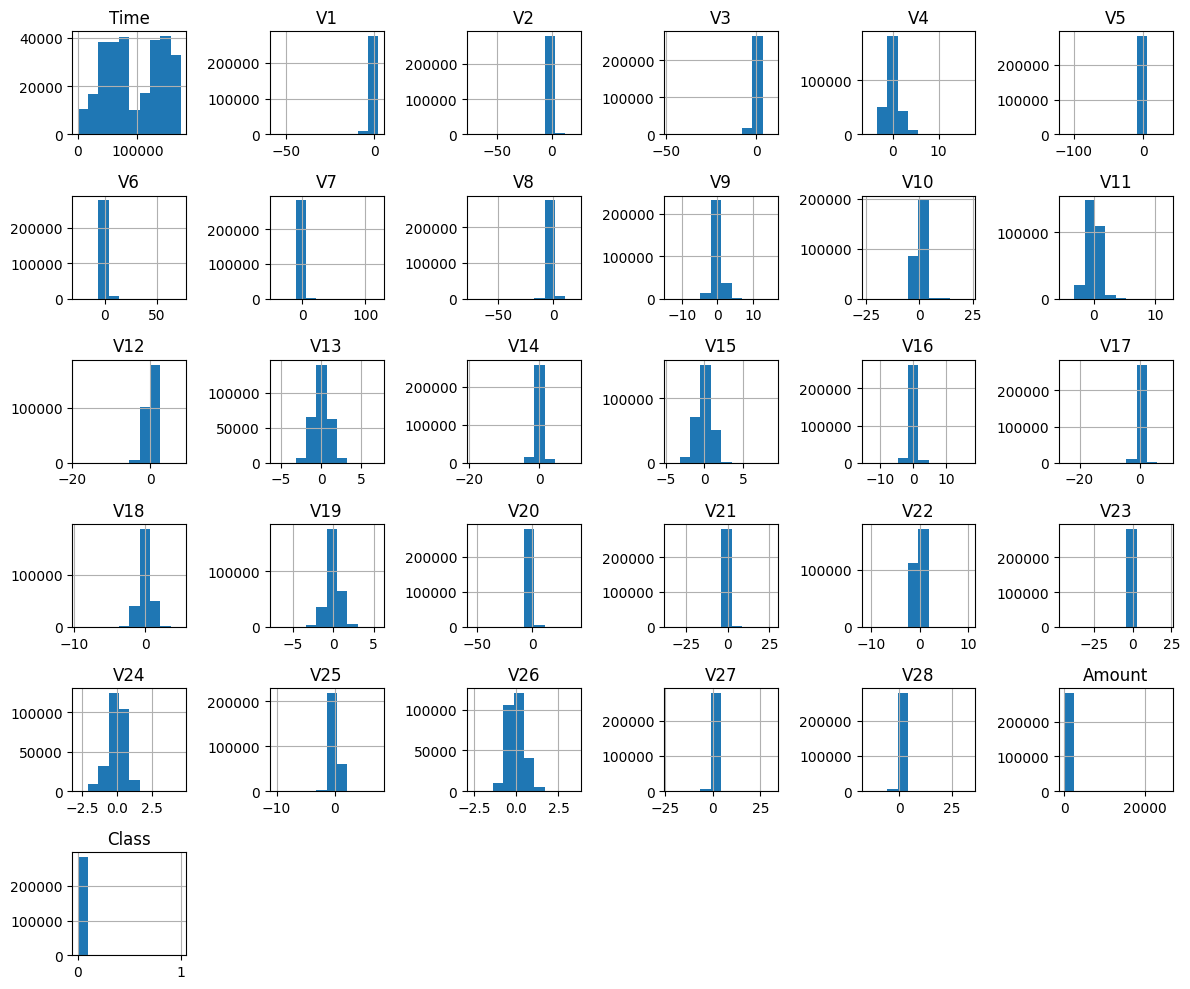

In [12]:
fig = plt.figure(figsize=(12,10))
df.hist(ax=fig)
plt.tight_layout()

<Axes: ylabel='count'>

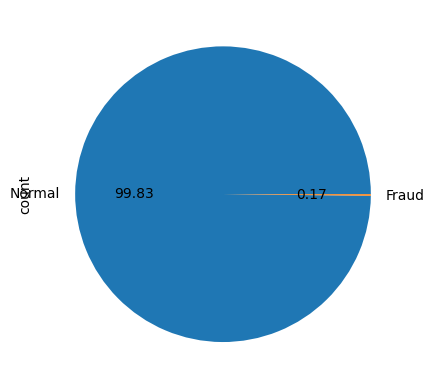

In [13]:
df['Class'].value_counts().plot(kind='pie', labels=LABELS, autopct='%.2f')

#### The dataset is highly imbalanced

### **Plotting correlation**

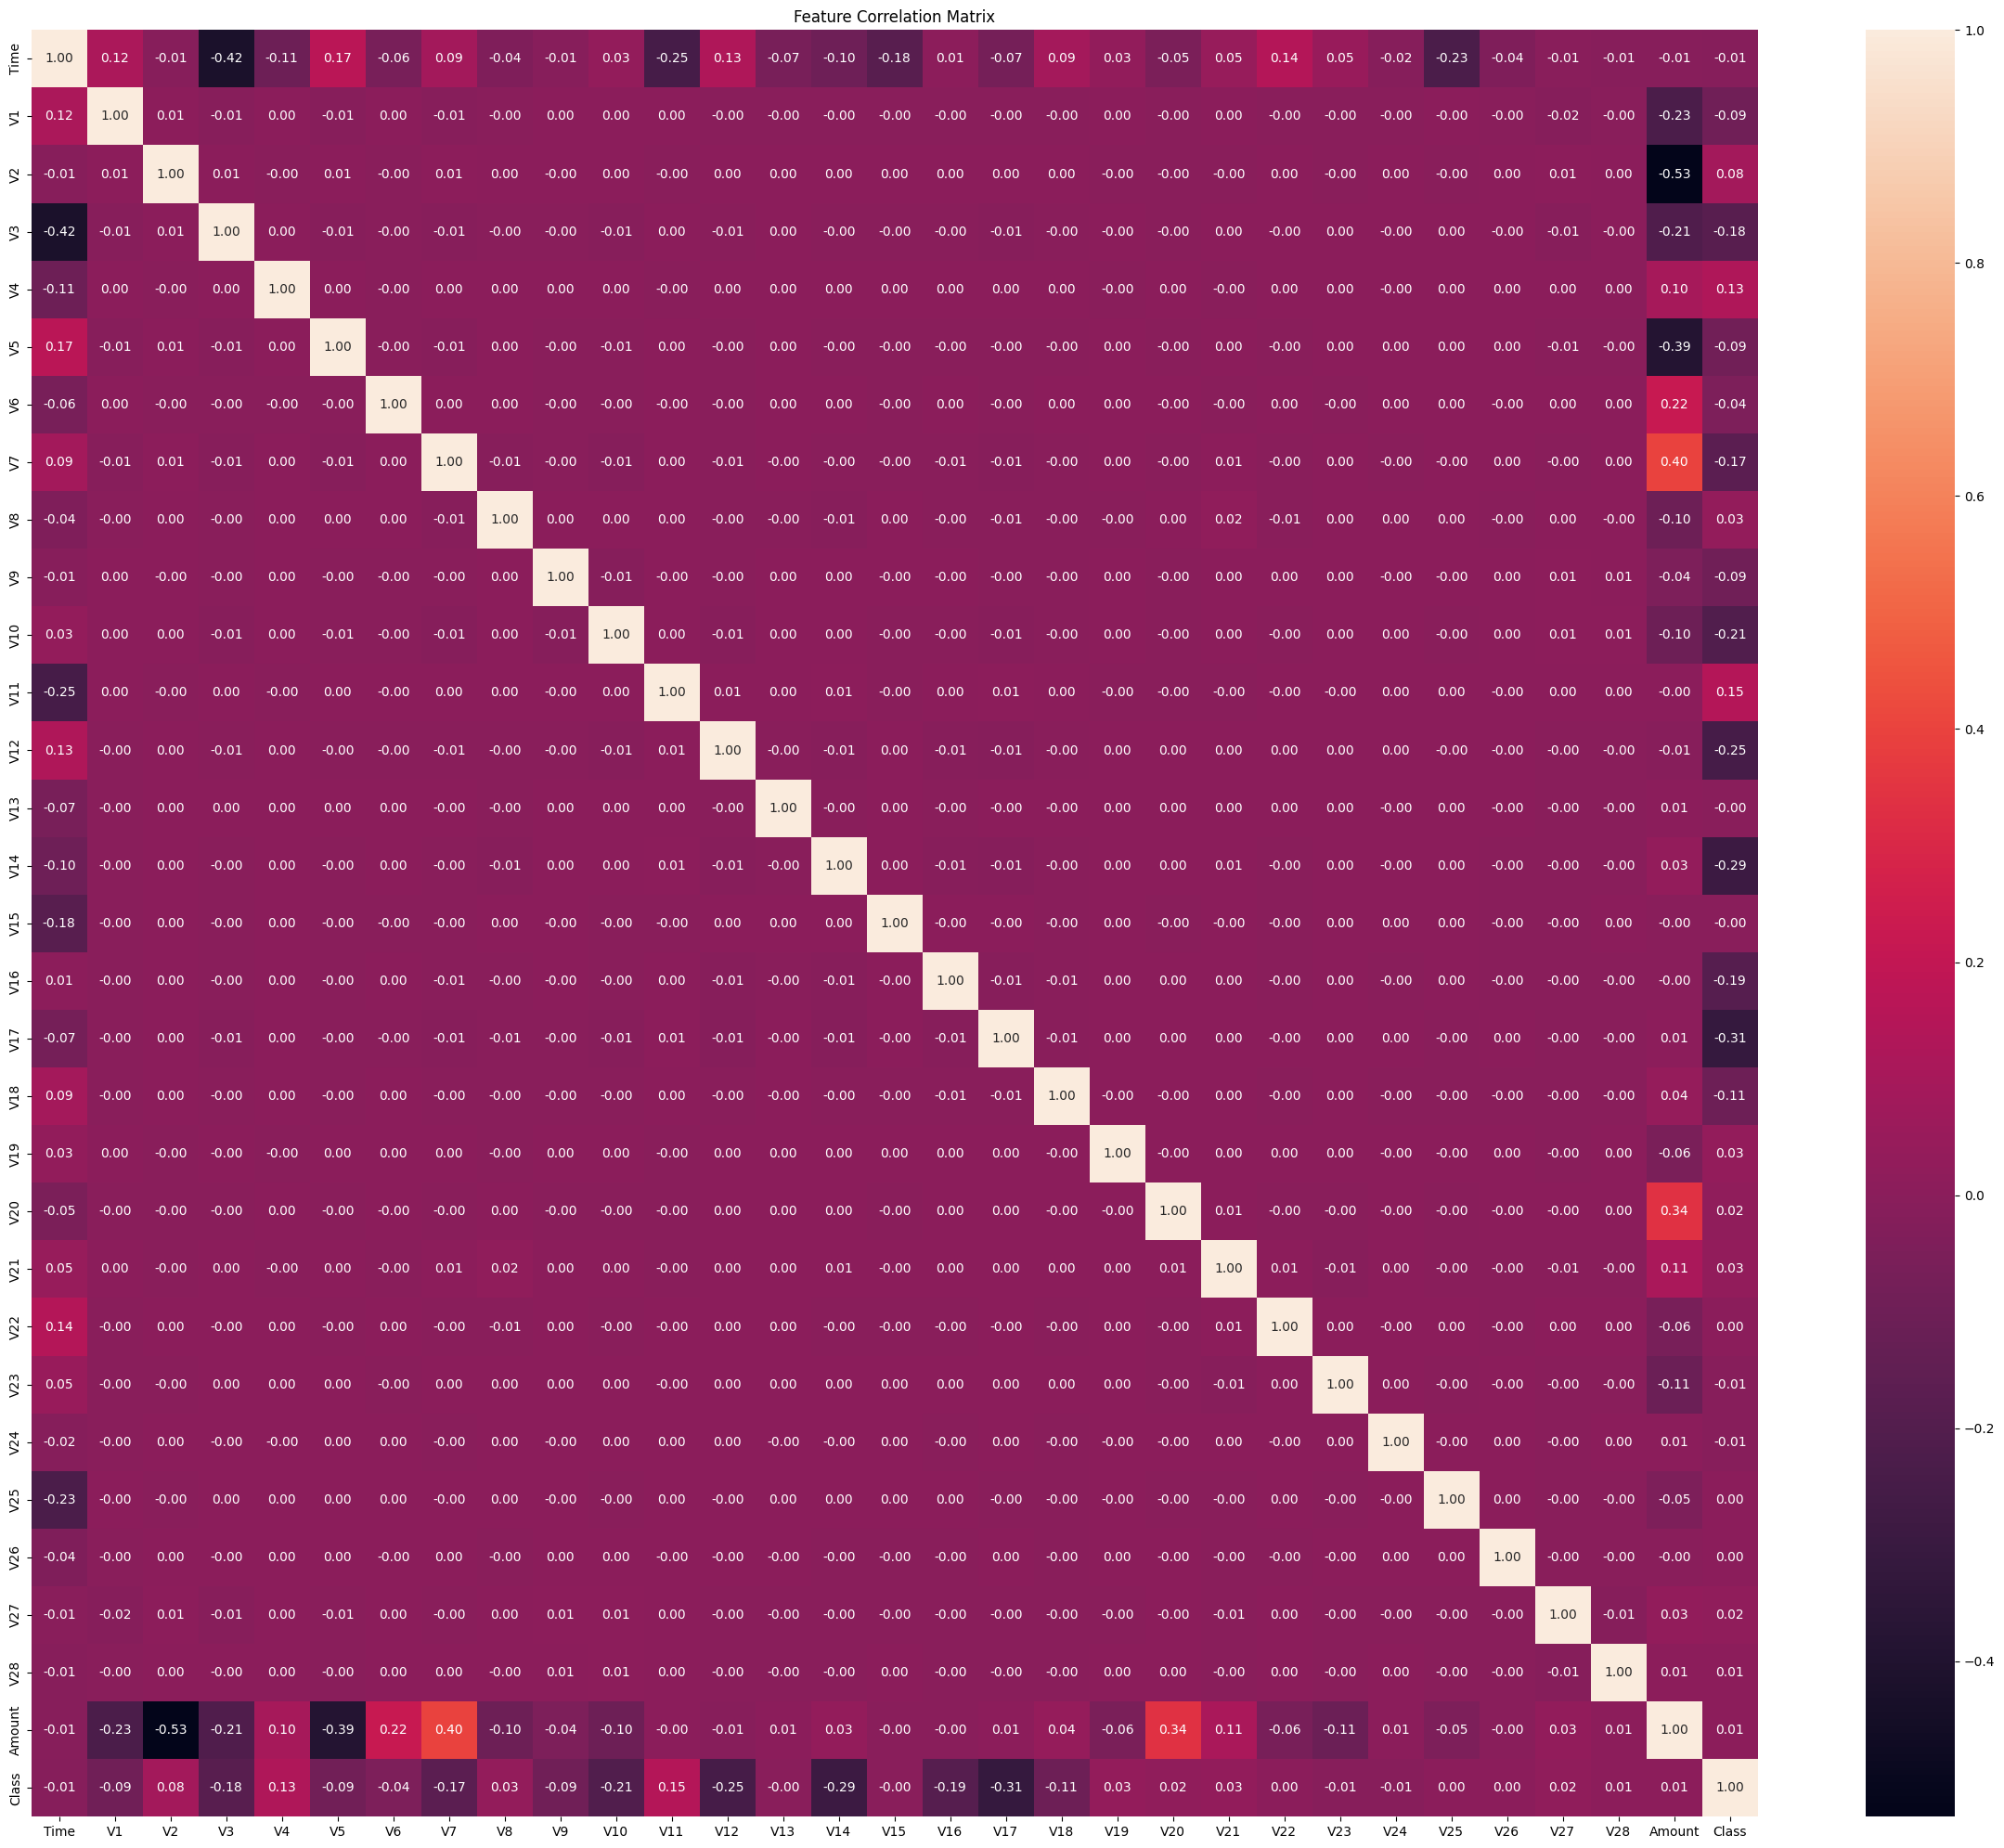

In [14]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [15]:
print(df['Class'].value_counts())
print(df['Amount'].sort_values(ascending=False).head(10))

Class
0    283253
1       473
Name: count, dtype: int64
274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


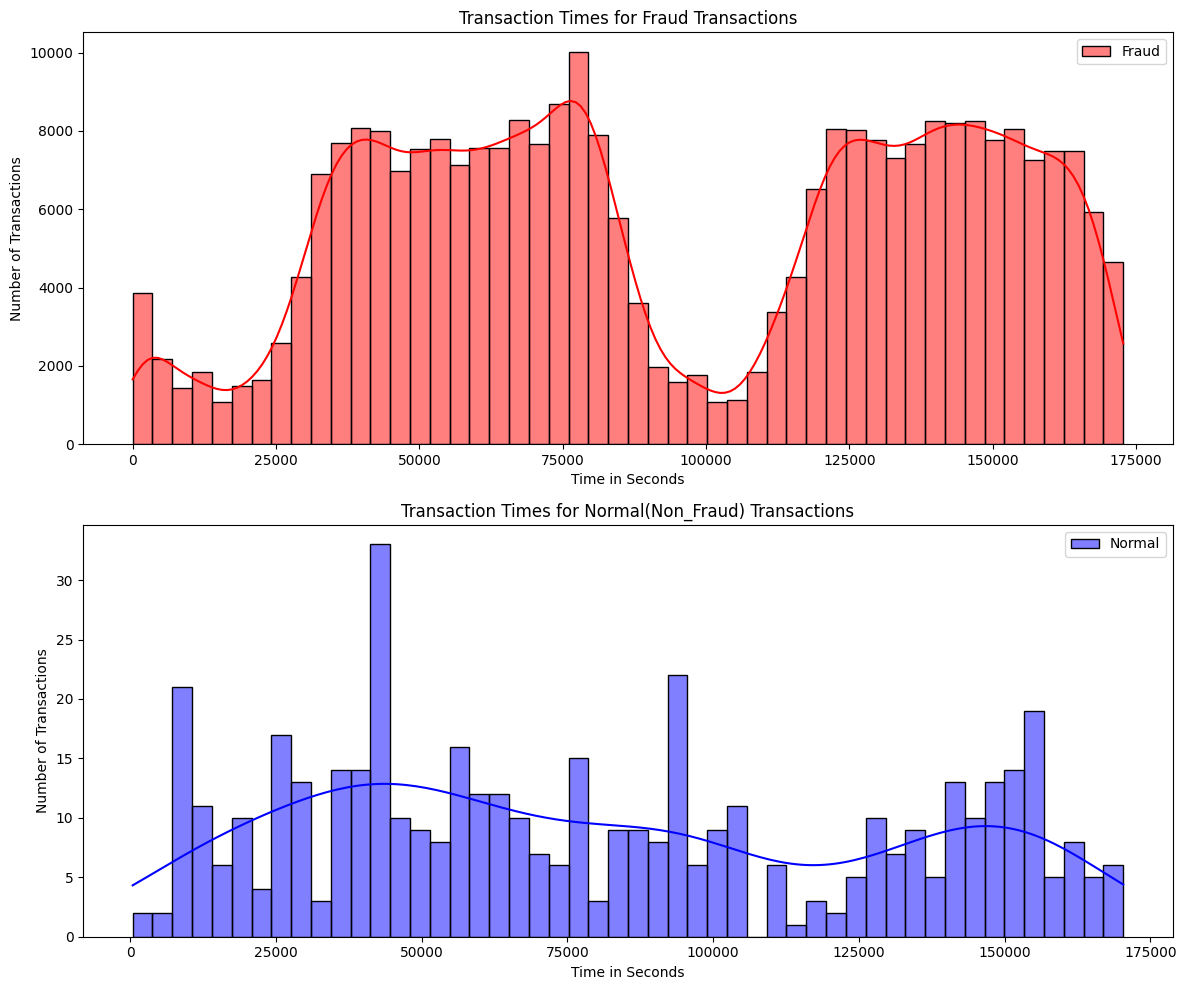

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#fraud transactions
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='red', label='Fraud', ax=ax1)
ax1.set_title('Transaction Times for Fraud Transactions')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

#normal transactions
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='blue', label='Normal', ax=ax2)
ax2.set_title('Transaction Times for Normal(Non_Fraud) Transactions')
ax2.set_xlabel('Time in Seconds')
ax2.set_ylabel('Number of Transactions')
ax2.legend()

plt.tight_layout()
plt.show()

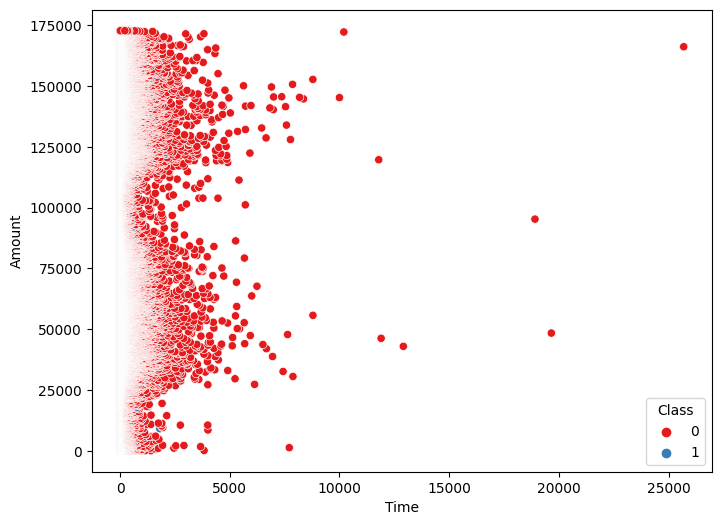

In [17]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='Amount',y='Time',data=df,hue='Class',palette='Set1')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

Dropping Amount and Time variables

In [18]:
df.drop('Time', axis = 1, inplace=True)
df.drop('Amount', axis = 1, inplace=True)

# **Feature Selection**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


X = df.drop('Class',axis=1)
y = df['Class']
# Build a logreg and compute the feature importances
model = LogisticRegression()
rfe = RFE(estimator=model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V20', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28']


#### We will use only Selected features and drop all insignificant features to get better performance of the model

In [20]:
df=df.drop(['V1','V5','V2','V3','V6','V7','V11','V12','V15','V17','V18','V19','V25','V26'],axis=1)

In [21]:
df.head()

,V4,V8,V9,V10,V13,V14,V16,V20,V21,V22,V23,V24,V27,V28,Class
0,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,-0.470401,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.133558,-0.021053,0
1,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,0.463917,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,-0.008983,0.014724,0
2,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,-2.890083,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.055353,-0.059752,0
3,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-1.059647,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.062723,0.061458,0
4,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.451449,0.408542,-0.009431,0.798278,-0.137458,0.141267,0.219422,0.215153,0


# **Splitting data into input(x) and output(y) variables**

In [22]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [23]:
x.head(5)

,V4,V8,V9,V10,V13,V14,V16,V20,V21,V22,V23,V24,V27,V28
0,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,-0.470401,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.133558,-0.021053
1,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,0.463917,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,-0.008983,0.014724
2,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,-2.890083,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.055353,-0.059752
3,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-1.059647,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.062723,0.061458
4,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.451449,0.408542,-0.009431,0.798278,-0.137458,0.141267,0.219422,0.215153


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

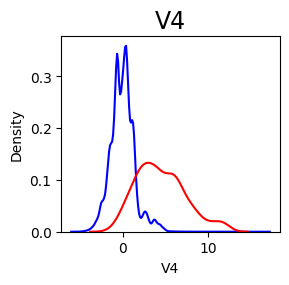

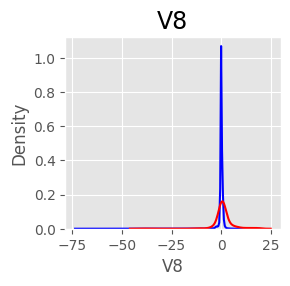

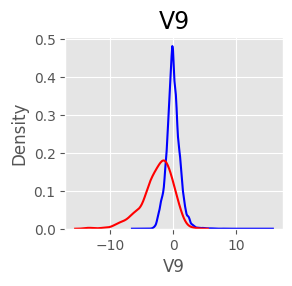

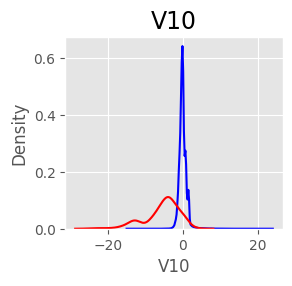

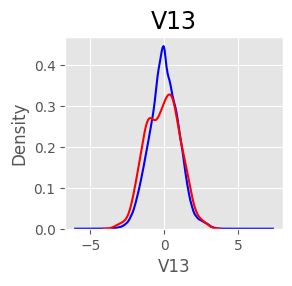

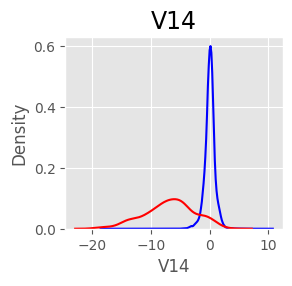

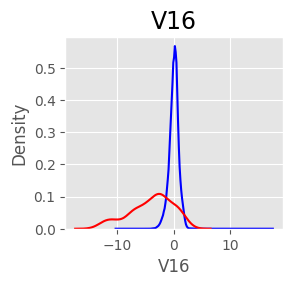

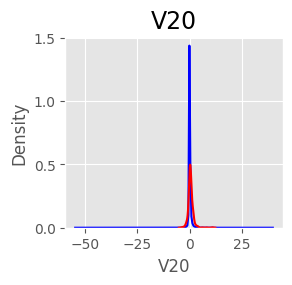

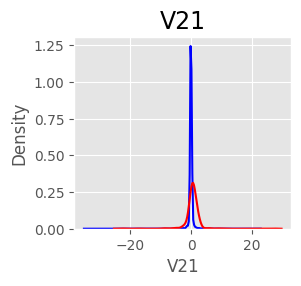

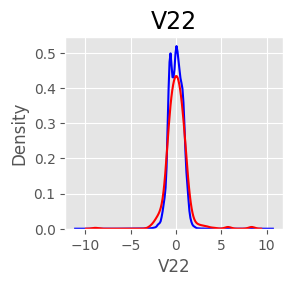

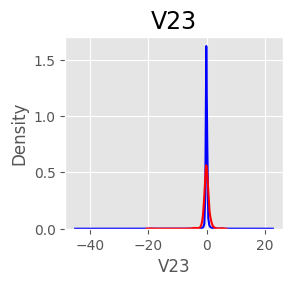

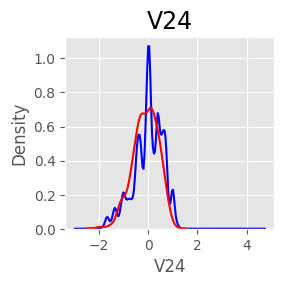

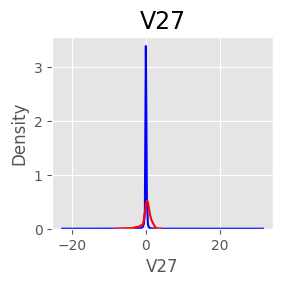

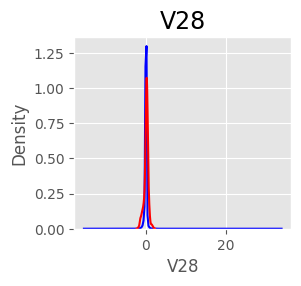

In [25]:
col = list(x.columns.values)
Normal=df.Class==0
Fraud=df.Class==1
for col in x.columns.values:
  plt.figure(figsize=(10,20))
  plt.subplot(8,4,1)
  plt.style.use('ggplot')
  sns.kdeplot(x[col][Normal], color='blue')
  sns.kdeplot(x[col][Fraud], color = 'red')
  plt.tight_layout()
  plt.title(col, fontsize=17)



#### This dataset looks prescaled,we will not use any scaling method further

In [26]:
##Splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
print('x_train=', x_train.shape)
print('y_train=', y_train.shape)
print('x_test=', x_test.shape)
print('y_test=', y_test.shape)

x_train= (226980, 14)
y_train= (226980,)
x_test= (56746, 14)
y_test= (56746,)


# **Analyzing the data**

* ## *Logistic Regression*
* ##   *XGBoost Classifier*








# **Hyperparameter Optimizations**

* ##  *GridSearchCV*
* ##    *RandomizedSearchCV*

# **K-fold Cross validation Method**
 # **Precision-Recall Curve**
 # **Confusion Matrix**



# **Logistic Regression(Train and Test)**
#### **GridSearchCV()+RandomizedSearchCV()**
##### **Model Evaluation based on K-fold Cross validation Method**
*  **Cross_val_score() function**
*   **Cross_validate() function**
###### **Precision-Recall Curve**
##### **Confusion Matrix**

Train/Test split results:
LogisticRegression accuracy is 0.999
LogisticRegression log_loss is 0.004
LogisticRegression auc is 0.969


/tmp/ipykernel_33/3509904990.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
/tmp/ipykernel_33/3509904990.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


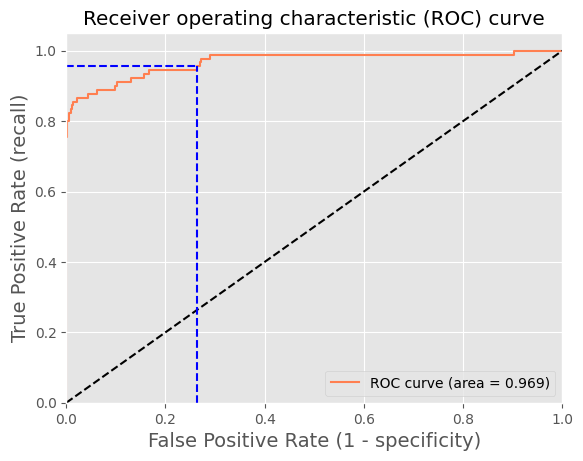

Using a threshold of 0.000 guarantees a sensitivity of 0.956 and a specificity of 0.737, i.e. a false positive rate of 26.29%.


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14) ##Sensitivity
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### LR_ROC=0.969

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
C_report_lr= classification_report(y_test, y_pred)
print('LR')
print(C_report_lr)

LR
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



### **Model evaluation based on K-fold cross-validation using `cross_val_score()` function**

In [30]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, x_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.999
LogisticRegression average log_loss is 0.004
LogisticRegression average auc is 0.976


### **Model evaluation based on K-fold cross-validation using `cross_validate()` function**

In [31]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, x_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.999 (+/-0.000)
LogisticRegression average log_loss: 0.004 (+/-0.001)
LogisticRegression average auc: 0.976 (+/-0.011)


In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
y_pred_proba_train_lr= lr.predict_proba(x_train)
roc_auc_score_train_lr = roc_auc_score(y_train, y_pred_proba_train_lr[:,1])
print('Train set roc-auc: ', roc_auc_score_train_lr)

y_pred_proba_test_lr= lr.predict_proba(x_test)
Y_pred_proba_test_lr = lr.predict_proba(x_test)
roc_auc_score_test_lr = roc_auc_score(y_test, y_pred_proba_test_lr[:,1])
print('Test set roc_auc: ', roc_auc_score_test_lr)

Train set roc-auc:  0.9777935664322385
Test set roc_auc:  0.9685177994289121


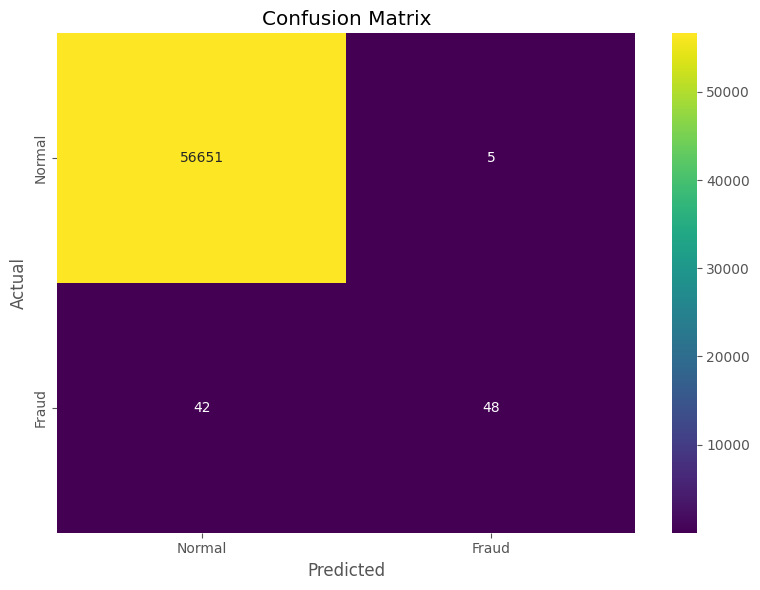

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create subplots
fig, ax = plt.subplots(1,  figsize=(8, 6))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=LABELS, yticklabels=LABELS)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')



# Adjust layout and display
plt.tight_layout()
plt.show()

### **Plotting Precision-Recall Curve**

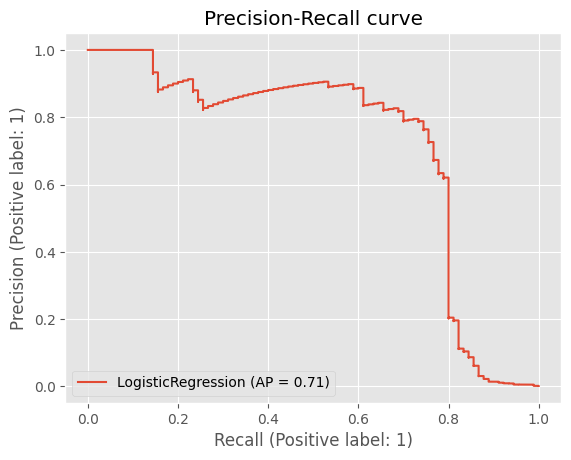

In [34]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

display = PrecisionRecallDisplay.from_estimator(
    classifier, x_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("Precision-Recall curve")

### **Hyperparameter=GridSearchCV()**

In [35]:
from sklearn.model_selection import GridSearchCV



param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(x_train, y_train)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)


best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.9991805445413693


In [36]:
log_bestGrid=gs.best_estimator_

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
y_pred_log = log_bestGrid.predict(x_test)
Confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

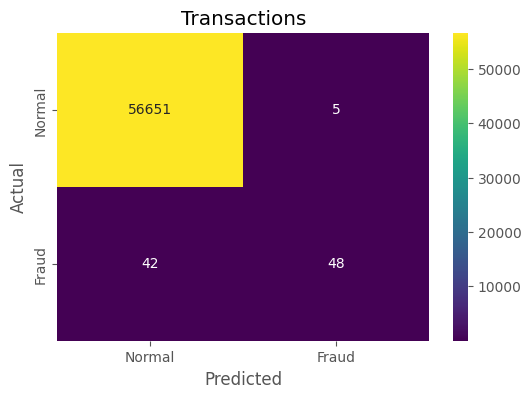

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion_matrix_log, cmap= 'viridis', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [40]:
y_pred_proba_train_log_bestGrid = log_bestGrid.predict_proba(x_train)
roc_auc_score_train_log_bestGrid = roc_auc_score(y_train, y_pred_proba_train_log_bestGrid[:,1])
print('Train set LR roc-auc:', roc_auc_score_train_log_bestGrid)
y_pred_proba_test_log_bestGrid = log_bestGrid.predict_proba(x_test)
roc_auc_score_test_log_bestGrid = roc_auc_score(y_test, y_pred_proba_test_log_bestGrid[:,1])
print('Test set LR roc_auc:', roc_auc_score_test_log_bestGrid)

Train set LR roc-auc: 0.978488765513028
Test set LR roc_auc: 0.9699262998525213


In [41]:
y_pred_log = log_bestGrid.predict(x_test)
C_report_lr= classification_report(y_test, y_pred_log)
print('LR')
print(C_report_lr)

LR
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [42]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(log_bestGrid, x_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(log_bestGrid, x_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(log_bestGrid, x_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.999
LogisticRegression average log_loss is 0.004
LogisticRegression average auc is 0.977


In [43]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}



results = cross_validate(log_bestGrid, x_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.999 (+/-0.000)
LogisticRegression average log_loss: 0.004 (+/-0.001)
LogisticRegression average auc: 0.977 (+/-0.011)


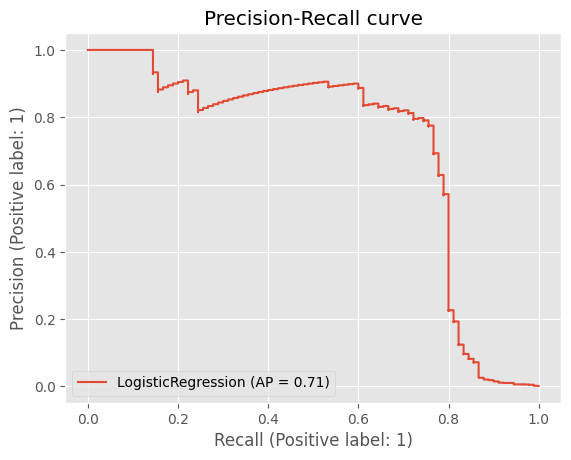

In [44]:
from sklearn.metrics import PrecisionRecallDisplay



display = PrecisionRecallDisplay.from_estimator(
    log_bestGrid, x_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("Precision-Recall curve")

### **Hyperparameter=RandomizedSearchCV**


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
param_dist = {

}
scoring = {
    "Accuracy": "accuracy",
    "AUC": "roc_auc",
    "Log_loss": "neg_log_loss"
}
RS = RandomizedSearchCV(LogisticRegression(), return_train_score=True,
                  param_distributions=param_dist, scoring=scoring, cv=10, refit='Accuracy')

RS.fit(x_train, y_train)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.9991805445413693


In [46]:
logreg_best_random=RS.best_estimator_

In [47]:
y_pred_logreg = logreg_best_random.predict(x_test)
Confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

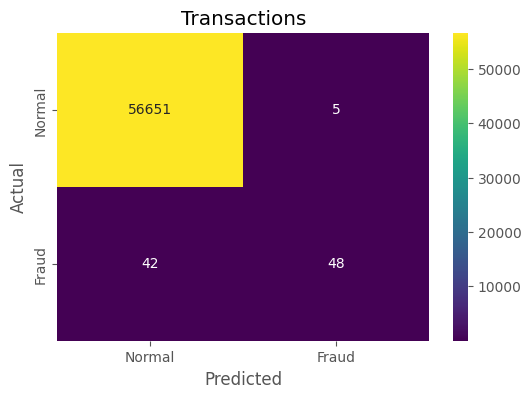

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion_matrix_logreg, cmap= 'viridis', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
y_pred_proba_train_logreg_best_random = logreg_best_random.predict_proba(x_train)
roc_auc_score_train_logreg_best_random= roc_auc_score(y_train, y_pred_proba_train_logreg_best_random[:,1])
print('Train set LR roc-auc:', roc_auc_score_train_logreg_best_random)
y_pred_proba_test_logreg_best_random = logreg_best_random.predict_proba(x_test)
roc_auc_score_test_logreg_best_random = roc_auc_score(y_test, y_pred_proba_test_logreg_best_random[:,1])
print('Test set LR roc_auc:', roc_auc_score_test_logreg_best_random)

Train set LR roc-auc: 0.9777935664322385
Test set LR roc_auc: 0.9685177994289121


In [50]:
y_pred_logreg = logreg_best_random.predict(x_test)
C_report_lr= classification_report(y_test, y_pred_logreg)
print('LR')
print(C_report_lr)

LR
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [51]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg_best_random, x_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg_best_random, x_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg_best_random, x_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.999
LogisticRegression average log_loss is 0.004
LogisticRegression average auc is 0.976


In [52]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}



results = cross_validate(logreg_best_random, x_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.999 (+/-0.000)
LogisticRegression average log_loss: 0.004 (+/-0.001)
LogisticRegression average auc: 0.976 (+/-0.011)


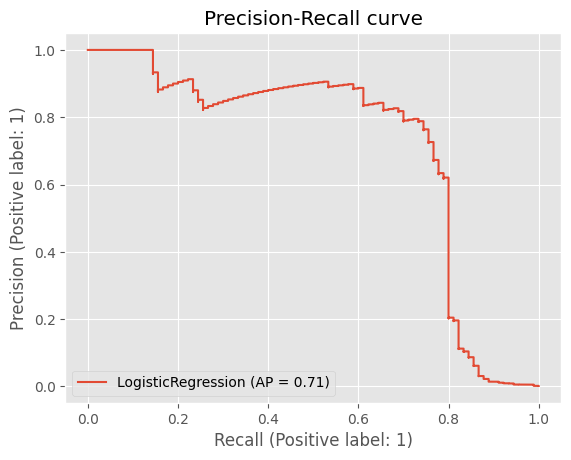

In [53]:
from sklearn.metrics import PrecisionRecallDisplay



display = PrecisionRecallDisplay.from_estimator(
    logreg_best_random, x_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("Precision-Recall curve")

# **XGBoost(Train and Test)**
### **GridSearchCV()+RandomizedSearchCV()**
##### **Model Evaluation based on K-fold Cross validation Method**
*  **Cross_val_score() function**
*   **Cross_validate() function**


##### **Confusion Matrix**

##### **Plotting Precision-Recall Curve**

Train/Test split results:
XGBClassifier accuracy is 0.999
XGBClassifier log_loss is 0.004
XGBClassifier auc is 0.963


/tmp/ipykernel_33/3104605393.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
/tmp/ipykernel_33/3104605393.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


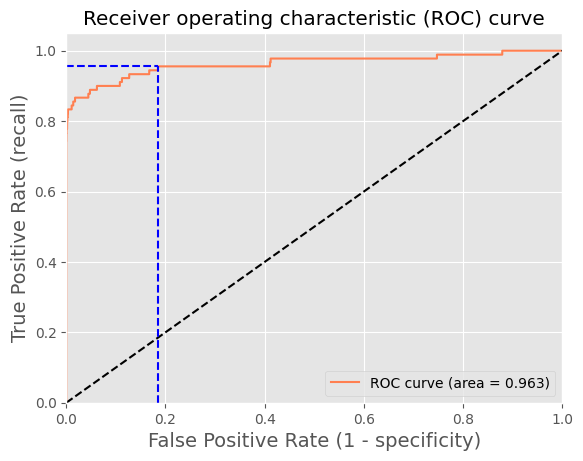

Using a threshold of 0.000 guarantees a sensitivity of 0.956 and a specificity of 0.815, i.e. a false positive rate of 18.48%.


In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



# check classification scores of logistic regression
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)
y_pred_proba = XGB.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(XGB.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(XGB.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(XGB.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14) ##Sensitivity
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### ROC =0.963

In [55]:
from xgboost import XGBClassifier
XGB= XGBClassifier()
XGB.fit(x_train, y_train)
y_pred=XGB.predict(x_test)
C_report_XGB= classification_report(y_test, y_pred)
print('XGB')
print(C_report_XGB)

XGB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.66      0.78        90

    accuracy                           1.00     56746
   macro avg       0.98      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746



### **Model evaluation based on K-fold cross-validation using `cross_val_score()` function**

In [56]:
# 10-fold cross-validation logistic regression
XGB = XGBClassifier()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(XGB, x_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(XGB, x_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(XGB, x_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(XGB.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(XGB.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(XGB.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
XGBClassifier average accuracy is 1.000
XGBClassifier average log_loss is 0.003
XGBClassifier average auc is 0.975


### **Model evaluation based on K-fold cross-validation using `cross_validate()` function**

In [57]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = XGBClassifier()

results = cross_validate(modelCV, x_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
XGBClassifier average accuracy: 1.000 (+/-0.000)
XGBClassifier average log_loss: 0.003 (+/-0.001)
XGBClassifier average auc: 0.975 (+/-0.023)


In [58]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)
y_pred_proba = XGB.predict_proba(x_test)[:, 1]
y_pred_proba_train_XGB= XGB.predict_proba(x_train)
roc_auc_score_train_XGB = roc_auc_score(y_train, y_pred_proba_train_XGB[:,1])
print('Train set roc-auc: ', roc_auc_score_train_XGB)

y_pred_proba_test_XGB= XGB.predict_proba(x_test)
Y_pred_proba_test_XGB = XGB.predict_proba(x_test)
roc_auc_score_test_XGB = roc_auc_score(y_test, y_pred_proba_test_XGB[:,1])
print('Test set roc_auc: ', roc_auc_score_test_XGB)

Train set roc-auc:  1.0
Test set roc_auc:  0.96267807273526


### **Confusion Matrix**

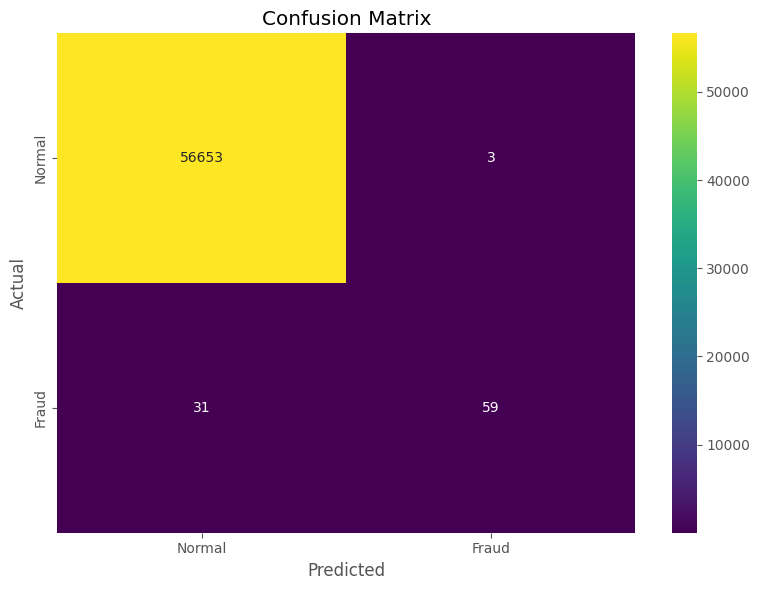

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create subplots
fig, ax = plt.subplots(1,  figsize=(8, 6))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=LABELS, yticklabels=LABELS)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')



# Adjust layout and display
plt.tight_layout()
plt.show()

### **Precision Recall Curve**

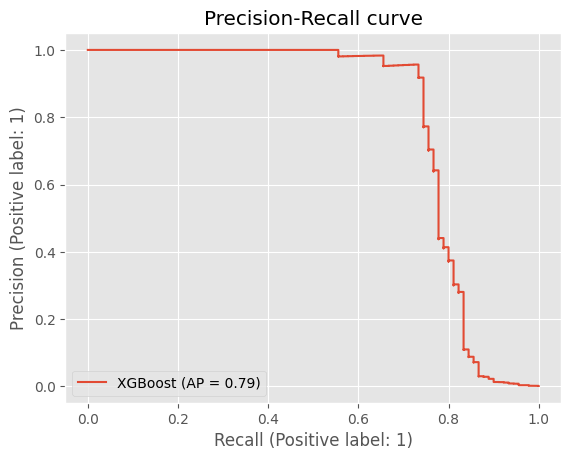

In [60]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = XGBClassifier()
classifier.fit(x_train, y_train)

display = PrecisionRecallDisplay.from_estimator(
    classifier, x_test, y_test, name="XGBoost"
)
_ = display.ax_.set_title("Precision-Recall curve")

### **Hyperparameter=RandomizedSearchCV()**

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy import stats

param_dist = {
    "max_depth": stats.randint(5, 10),
    "max_leaf_nodes": stats.randint(50, 200),
    "min_samples_leaf": stats.randint(10, 200),
}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

RS = RandomizedSearchCV(XGBClassifier(), return_train_score=True,
                  param_distributions=param_dist, scoring=scoring, cv=10, refit='Accuracy')

RS.fit(x_train, y_train)
results = RS.cv_results_

print('='*20)
print("best params: " + str(RS.best_estimator_))
print("best params: " + str(RS.best_params_))
print('best score:', RS.best_score_)
print('='*20)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:01:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:01:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:01:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:01:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:01:17]

best params: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaf_nodes=189,
              max_leaves=None, min_child_weight=None, min_samples_leaf=32,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, ...)
best params: {'max_depth': 6, 'max_leaf_nodes': 189, 'min_samples_leaf': 32}
best score: 0.9995682438981408


In [62]:
XGB_best_random=RS.best_estimator_

In [63]:
from sklearn.metrics import confusion_matrix
y_pred_XGB = XGB_best_random.predict(x_test)
Confusion_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)

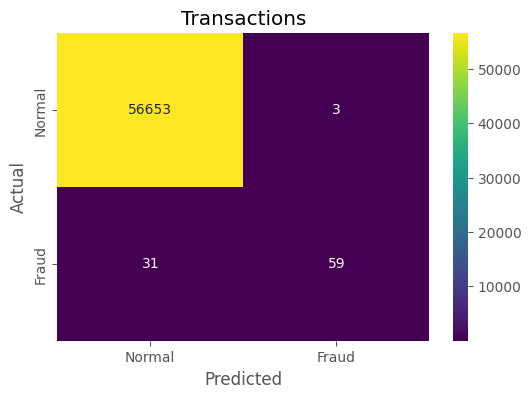

In [64]:
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion_matrix_XGB, cmap= 'viridis', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [65]:
y_pred_proba_train_XGB_best_random = XGB_best_random.predict_proba(x_train)
roc_auc_score_train_XGB_best_random = roc_auc_score(y_train, y_pred_proba_train_XGB_best_random[:,1])
print('Train set XGB roc-auc:', roc_auc_score_train_XGB_best_random)
y_pred_proba_test_XGB_best_random = XGB_best_random.predict_proba(x_test)
roc_auc_score_test_XGB_best_random = roc_auc_score(y_test, y_pred_proba_test_XGB_best_random[:,1])
print('Test set XGB roc_auc:', roc_auc_score_test_XGB_best_random)

Train set XGB roc-auc: 1.0
Test set XGB roc_auc: 0.96267807273526


In [66]:
y_pred_XGB = XGB_best_random.predict(x_test)
C_report_xgb= classification_report(y_test, y_pred_XGB)
print('XGB')
print(C_report_XGB)

XGB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.66      0.78        90

    accuracy                           1.00     56746
   macro avg       0.98      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746



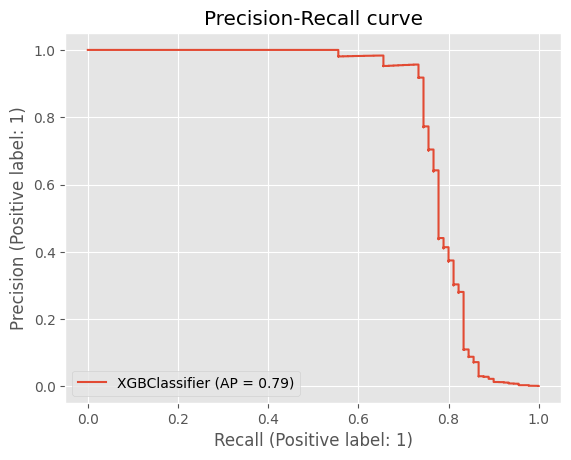

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = XGBClassifier()
classifier.fit(x_train, y_train)

display = PrecisionRecallDisplay.from_estimator(
    classifier, x_test, y_test, name="XGBClassifier"
)
_ = display.ax_.set_title("Precision-Recall curve")

### **Hyperparameter=GridSearchCV**

In [68]:
from sklearn.model_selection import GridSearchCV



param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(XGBClassifier(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(x_train, y_train)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:05:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:05:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:05:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:05:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:05:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/pytho

best params: XGBClassifier(C=1e-05, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
best params: {'C': 1e-05}
best score: 0.9995682438981408


In [69]:
XGB_bestGrid=gs.best_estimator_

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_pred_XGB = XGB_bestGrid.predict(x_test)
Confusion_matrix_log = confusion_matrix(y_test, y_pred_XGB)

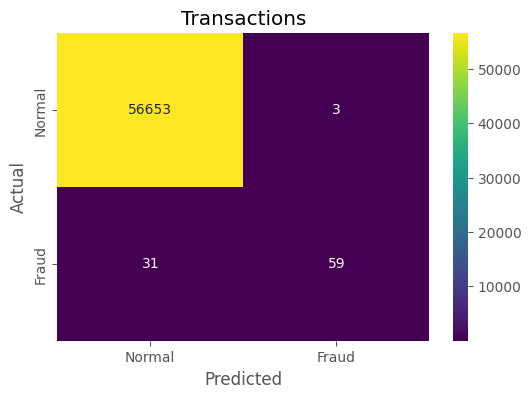

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion_matrix_log, cmap= 'viridis', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [73]:
y_pred_proba_train_XGB_bestGrid = XGB_bestGrid.predict_proba(x_train)
roc_auc_score_train_XGB_bestGrid = roc_auc_score(y_train, y_pred_proba_train_XGB_bestGrid[:,1])
print('Train set XGB roc-auc:', roc_auc_score_train_XGB_bestGrid)
y_pred_proba_test_XGB_bestGrid = XGB_bestGrid.predict_proba(x_test)
roc_auc_score_test_XGB_bestGrid = roc_auc_score(y_test, y_pred_proba_test_XGB_bestGrid[:,1])
print('Test set XGB roc_auc:', roc_auc_score_test_XGB_bestGrid)

Train set XGB roc-auc: 1.0
Test set XGB roc_auc: 0.96267807273526


In [74]:
y_pred_XGB = XGB_bestGrid.predict(x_test)
C_report_XGB= classification_report(y_test, y_pred_XGB)
print('XGB')
print(C_report_XGB)

XGB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.66      0.78        90

    accuracy                           1.00     56746
   macro avg       0.98      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746



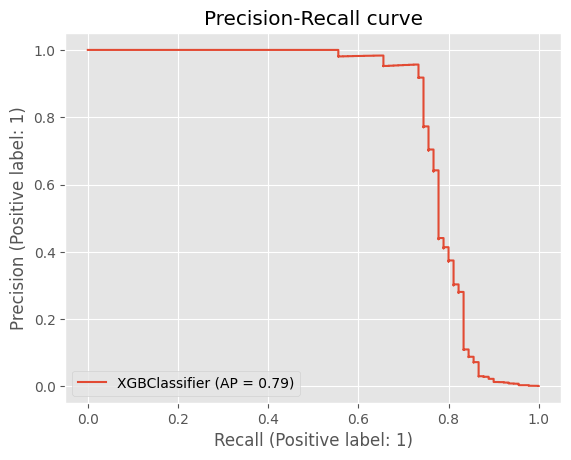

In [75]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = XGBClassifier()
classifier.fit(x_train, y_train)

display = PrecisionRecallDisplay.from_estimator(
    classifier, x_test, y_test, name="XGBClassifier"
)
_ = display.ax_.set_title("Precision-Recall curve")

#### We can clearly observe that, this dataset is highly imbalanced in favour of non fraudulent transactions,we will use **sampling method**

# **Undersampling method(EditedNearestNeighbours)**


##### The edited nearest neighbours methodology uses K-Nearest Neighbours to identify the neighbours of the targeted class samples, and then removes observations if any or most of their neighbours are from a different class.
##### EditedNearestNeighbours carries out the following steps:

#### 1.Train a K-Nearest neighbours using the entire dataset.

#### 2.Find each observations’ K closest neighbours (only for the targeted classes).

#### 3.Remove observations if any or most of its neighbours belong to a different class.

*  **Logistic Regression**
*   **XGBoostClassifier**



In [76]:
from imblearn.under_sampling import EditedNearestNeighbours
enn= EditedNearestNeighbours()
x_enn, y_enn = enn.fit_resample(x_train, y_train)



In [77]:
x_enn.shape, y_enn.shape

((226853, 14), (226853,))

Text(0.5, 1.0, 'Original dataset')

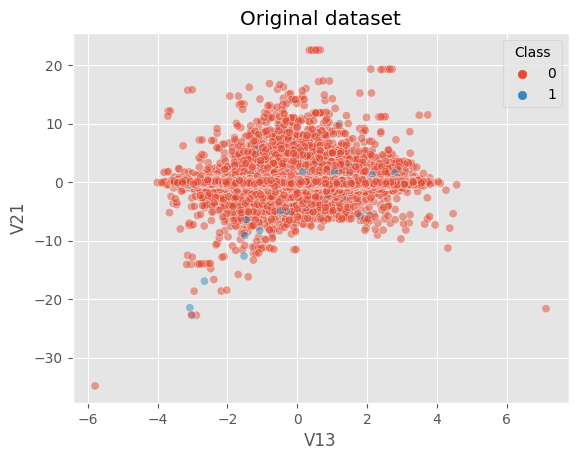

In [78]:
## after sampling checking the variables 'V21' and 'V13' for original dataset
sns.scatterplot(data=x_train, x='V13', y='V21', hue=y_train, alpha=0.5)
plt.title('Original dataset')

Text(0.5, 1.0, 'Undersampled by ENN')

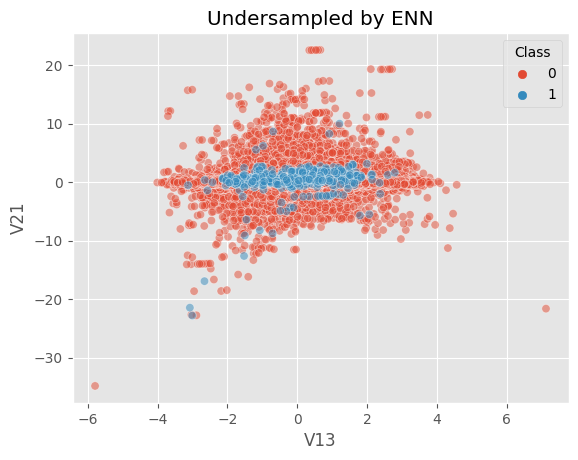

In [81]:
## after sampling check the variables 'V21' and 'V13' for original dataset
sns.scatterplot(data=x_enn, x='V13', y='V21', hue=y_enn, alpha=0.5)
plt.title('Undersampled by ENN')

# **(Logistic Regression +EditedNearestNeighbours)**

In [82]:
LogReg_enn = LogisticRegression()

LogReg_enn.fit(x_enn, y_enn)

#Test and predict
y_pred_enn = LogReg_enn.predict(x_test)
roc_auc_enn = roc_auc_score(y_test, y_pred_enn)

report_enn = classification_report(y_test, y_pred_enn)
print("Classification Report for Logistic Regression Model (ENN):")
print(report_enn)
print("ROC AUC:", roc_auc_enn)

Classification Report for Logistic Regression Model (ENN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.59      0.72        90

    accuracy                           1.00     56746
   macro avg       0.96      0.79      0.86     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.794400318491324


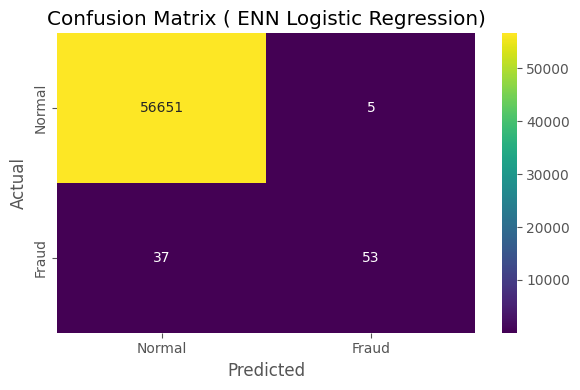

In [84]:

from sklearn.metrics import confusion_matrix
confusion_matrix_enn = confusion_matrix(y_test, y_pred_enn)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#smote
sns.heatmap(confusion_matrix_enn, annot=True, fmt="d", cmap="viridis",
            xticklabels=LABELS, yticklabels=LABELS, ax=ax)
ax.set_title('Confusion Matrix ( ENN Logistic Regression)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [86]:
y_pred_proba_train_LogReg_enn = LogReg_enn.predict_proba(x_enn)
roc_auc_score_train_LogReg_enn = roc_auc_score(y_enn, y_pred_proba_train_LogReg_enn[:,1])
print('Train set roc-auc:', roc_auc_score_train_LogReg_enn)

y_pred_proba_test_LogReg_enn = LogReg_enn.predict_proba(x_test)
roc_auc_score_test_LogReg_enn = roc_auc_score(y_test, y_pred_proba_test_LogReg_enn[:,1])
print('Test set roc_auc:', roc_auc_score_test_LogReg_enn)

Train set roc-auc: 0.9777336141329505
Test set roc_auc: 0.9684673977846812


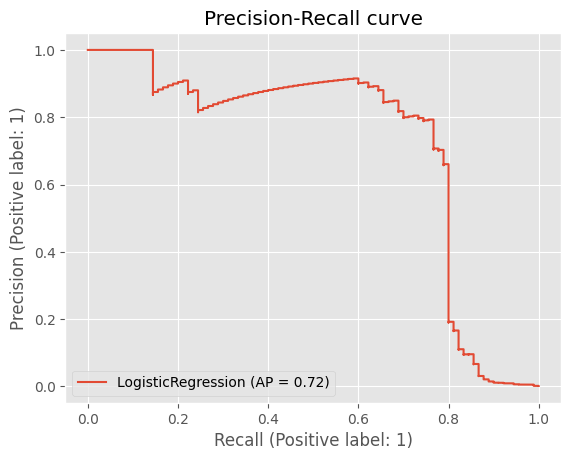

In [87]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = LogisticRegression()
classifier.fit(x_enn, y_enn)

display = PrecisionRecallDisplay.from_estimator(
    classifier,x_test,y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("Precision-Recall curve")

# **(XGBoost+ EditedNearestNeighbours)**

In [88]:
from imblearn.under_sampling import EditedNearestNeighbours
enn= EditedNearestNeighbours()
x_enn, y_enn = enn.fit_resample(x_train, y_train)



In [89]:
XGB_enn = XGBClassifier()

XGB_enn.fit(x_enn, y_enn)

#Test and predict
y_pred_XGB_enn = XGB_enn.predict(x_test)
roc_auc_XGB_enn = roc_auc_score(y_test, y_pred_XGB_enn)

report_XGB_enn = classification_report(y_test, y_pred_XGB_enn)
print("Classification Report for XGBClassifier (ENN):")
print(report_XGB_enn)
print("ROC AUC:", roc_auc_XGB_enn)

Classification Report for XGBClassifier (ENN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.8610758103486147


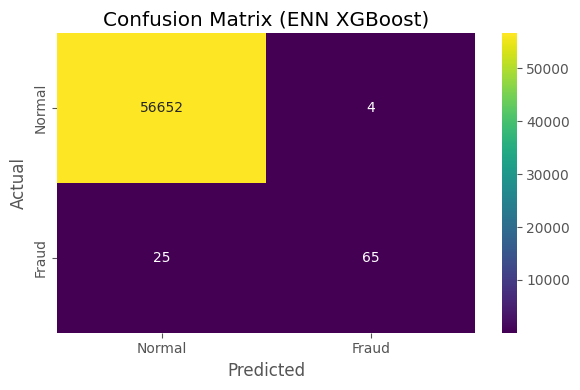

In [90]:

from sklearn.metrics import confusion_matrix
confusion_matrix_enn = confusion_matrix(y_test, y_pred_XGB_enn)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#smote
sns.heatmap(confusion_matrix_enn, annot=True, fmt="d", cmap="viridis",
            xticklabels=LABELS, yticklabels=LABELS, ax=ax)
ax.set_title('Confusion Matrix (ENN XGBoost)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [92]:
y_pred_proba_train_XGB_enn = XGB_enn.predict_proba(x_enn)
roc_auc_score_train_XGB_enn = roc_auc_score(y_enn, y_pred_proba_train_XGB_enn[:,1])
print('Train set roc-auc:', roc_auc_score_train_XGB_enn)

y_pred_proba_test_XGB_enn = XGB_enn.predict_proba(x_test)
roc_auc_score_test_XGB_enn = roc_auc_score(y_test, y_pred_proba_test_XGB_enn[:,1])
print('Test set roc_auc:', roc_auc_score_test_XGB_enn)

Train set roc-auc: 1.0
Test set roc_auc: 0.9648450492641752


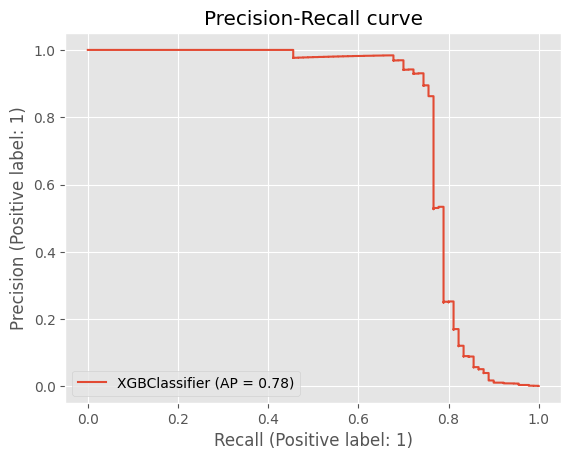

In [93]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = XGBClassifier()
classifier.fit(x_enn, y_enn)

display = PrecisionRecallDisplay.from_estimator(
    classifier,x_test,y_test, name="XGBClassifier"
)
_ = display.ax_.set_title("Precision-Recall curve")

# **OverSamplingMethod(SMOTE)**

##### SMOTE: Synthetic Minority Oversampling Technique

##### SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

##### **Logistic Regression**
##### **XGBClassifier**

In [94]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled_smote, y_resampled_smote = smote.fit_resample(x_train,y_train)
#Class distribution
print("Class distribution in the SMOTE oversampled training set:")
print(pd.Series(y_resampled_smote).value_counts(normalize=True) * 100)

Class distribution in the SMOTE oversampled training set:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Original dataset')

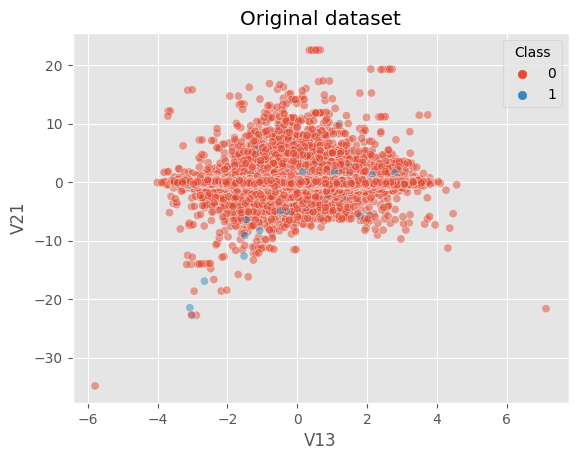

In [95]:
sns.scatterplot(data=x_train, x='V13', y='V21', hue=y_train, alpha=0.5)
plt.title('Original dataset')

Text(0.5, 1.0, 'Oversampled by SMOTE')

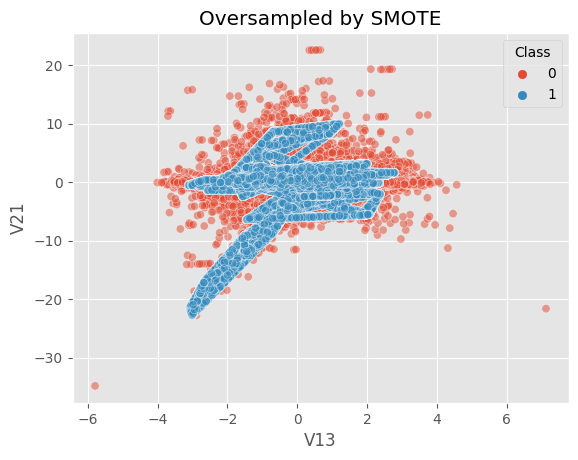

In [113]:
sns.scatterplot(data=x_resampled_smote, x='V13', y='V21', hue=y_resampled_smote, alpha=0.5)
plt.title('Oversampled by SMOTE')

# **(LogisticRegression+SMOTE)**

In [114]:
LogReg_smote = LogisticRegression()

LogReg_smote.fit(x_resampled_smote, y_resampled_smote)

#Test and predict
y_pred_smote = LogReg_smote.predict(x_resampled_smote)
roc_auc_smote = roc_auc_score(y_resampled_smote, y_pred_smote)

report_smote = classification_report(y_resampled_smote, y_pred_smote)
print("Classification Report for Logistic Regression Model (SMOTE):")
print(report_smote)
print("ROC AUC:", roc_auc_smote)

Classification Report for Logistic Regression Model (SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    226597
           1       0.97      0.90      0.93    226597

    accuracy                           0.94    453194
   macro avg       0.94      0.94      0.94    453194
weighted avg       0.94      0.94      0.94    453194

ROC AUC: 0.9353212972810762


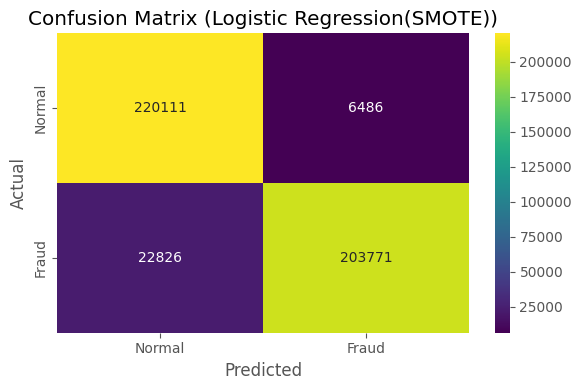

In [115]:

from sklearn.metrics import confusion_matrix
confusion_matrix_smote = confusion_matrix(y_resampled_smote, y_pred_smote)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#smote
sns.heatmap(confusion_matrix_smote, annot=True, fmt="d", cmap="viridis",
            xticklabels=LABELS, yticklabels=LABELS, ax=ax)
ax.set_title('Confusion Matrix (Logistic Regression(SMOTE))')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [116]:
y_pred_proba_train_LogReg_smote = LogReg_smote.predict_proba(x_resampled_smote)
roc_auc_score_train_LogReg_smote = roc_auc_score(y_resampled_smote, y_pred_proba_train_LogReg_smote[:,1])
print('Train set roc-auc:', roc_auc_score_train_LogReg_smote)

y_pred_proba_test_LogReg_smote = LogReg_smote.predict_proba(x_test)
roc_auc_score_test_LogReg_smote = roc_auc_score(y_test, y_pred_proba_test_LogReg_smote[:,1])
print('Test set roc_auc:', roc_auc_score_test_LogReg_smote)

Train set roc-auc: 0.984664416573617
Test set roc_auc: 0.9717103611660234


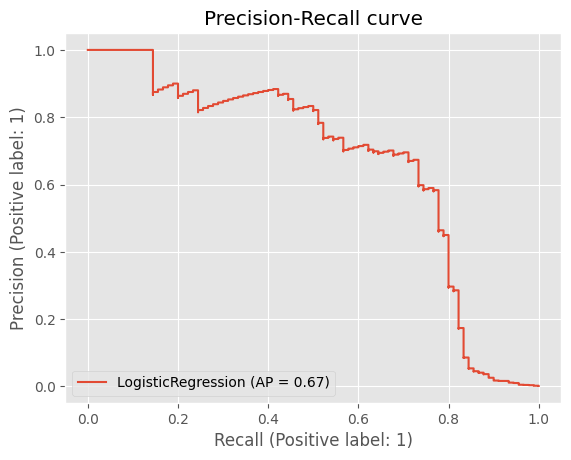

In [117]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = LogisticRegression()
classifier.fit(x_resampled_smote, y_resampled_smote)

display = PrecisionRecallDisplay.from_estimator(
    classifier,x_test,y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("Precision-Recall curve")

# **(XGBoost+SMOTE)**

In [118]:
XGB_smote = XGBClassifier()
XGB_smote.fit(x_resampled_smote, y_resampled_smote)

#Test and predict
y_pred_smote = XGB_smote.predict(x_resampled_smote)
roc_auc_smote = roc_auc_score(y_resampled_smote, y_pred_smote)

report_smote = classification_report(y_resampled_smote, y_pred_smote)
print("Classification Report for XGB (SMOTE):")
print(report_smote)
print("ROC AUC:", roc_auc_smote)

Classification Report for XGB (SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00    226597

    accuracy                           1.00    453194
   macro avg       1.00      1.00      1.00    453194
weighted avg       1.00      1.00      1.00    453194

ROC AUC: 0.9998720194883428


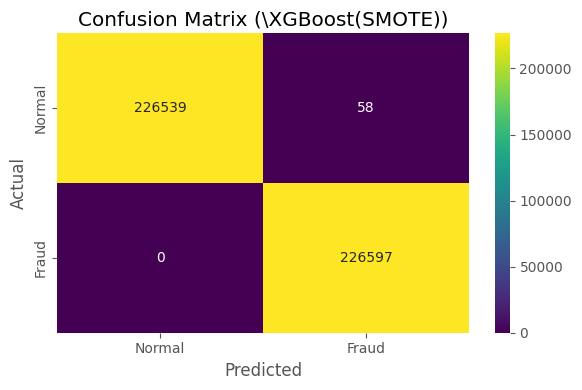

In [119]:

from sklearn.metrics import confusion_matrix
confusion_matrix_smote = confusion_matrix(y_resampled_smote, y_pred_smote)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#smote
sns.heatmap(confusion_matrix_smote, annot=True, fmt="d", cmap="viridis",
            xticklabels=LABELS, yticklabels=LABELS, ax=ax)
ax.set_title('Confusion Matrix (\XGBoost(SMOTE))')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [120]:
y_pred_proba_train_XGB_smote = XGB_smote.predict_proba(x_resampled_smote)
roc_auc_score_train_XGB_smote = roc_auc_score(y_resampled_smote, y_pred_proba_train_XGB_smote[:,1])
print('Train set roc-auc:', roc_auc_score_train_XGB_smote)

y_pred_proba_test_XGB_smote = XGB_smote.predict_proba(x_test)
roc_auc_score_test_XGB_smote = roc_auc_score(y_test, y_pred_proba_test_XGB_smote[:,1])
print('Test set roc_auc:', roc_auc_score_test_XGB_smote)

Train set roc-auc: 0.9999998778682755
Test set roc_auc: 0.9656710871065926


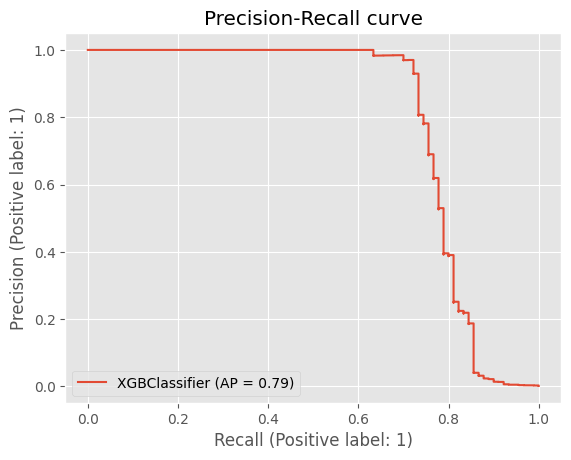

In [121]:
from sklearn.metrics import PrecisionRecallDisplay

classifier = XGBClassifier()
classifier.fit(x_resampled_smote, y_resampled_smote)

display = PrecisionRecallDisplay.from_estimator(
    classifier,x_test,y_test, name="XGBClassifier"
)
_ = display.ax_.set_title("Precision-Recall curve")

# **Combination of OverSampling and UnderSampling**
# * *SMOTETomek*
# * *SMOTETEENN*

##### **Logistic Regression**
##### **XGBClassifier**

In [122]:
from sklearn.datasets import make_classification

x_train,y_train = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.2, 0.7],
    class_sep=0.8,
    random_state=0,
)

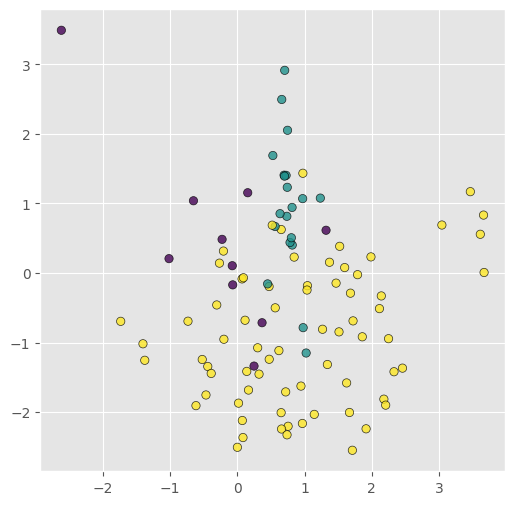

In [123]:
_, ax = plt.subplots(figsize=(6, 6))
_ = ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8, edgecolor="k")

 The following function will be used to plot the sample space after resampling to illustrate the characteristic of an algorithm.

In [124]:
from collections import Counter


def plot_resampling(x_train, y_train, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    x_res, y_res = sampler.fit_resample(x_train, y_train)
    ax.scatter(x_res[:, 0], x_res[:, 1],c=y_res, alpha=0.8, edgecolor="k")
    sns.despine(ax=ax, offset=10)
    ax.set_title(f"Decision function for {sampler}")
    return Counter(y_res)

 The following function will be used to plot the decision function of a classifier given some data.

In [125]:

def plot_decision_function(x_train, y_train, clf, ax):
    """Plot the decision function of the classifier and the original data"""
    plot_step = 0.02
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(x_train[:, 0], x_train[:, 1], alpha=0.8, c=y_train, edgecolor="k")
    ax.set_title(f"Resampling using {clf[0]}")

 **SMOTE** allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Two methods are usually used in the literature: (i) Tomek’s link and (ii) edited nearest neighbours cleaning methods. Imbalanced-learn provides two ready-to-use samplers SMOTETomek and SMOTEENN. In general, **SMOTEENN** cleans more noisy data than **SMOTETomek**.

In [126]:
from sklearn.linear_model import LogisticRegression

from imblearn.combine import SMOTEENN, SMOTETomek

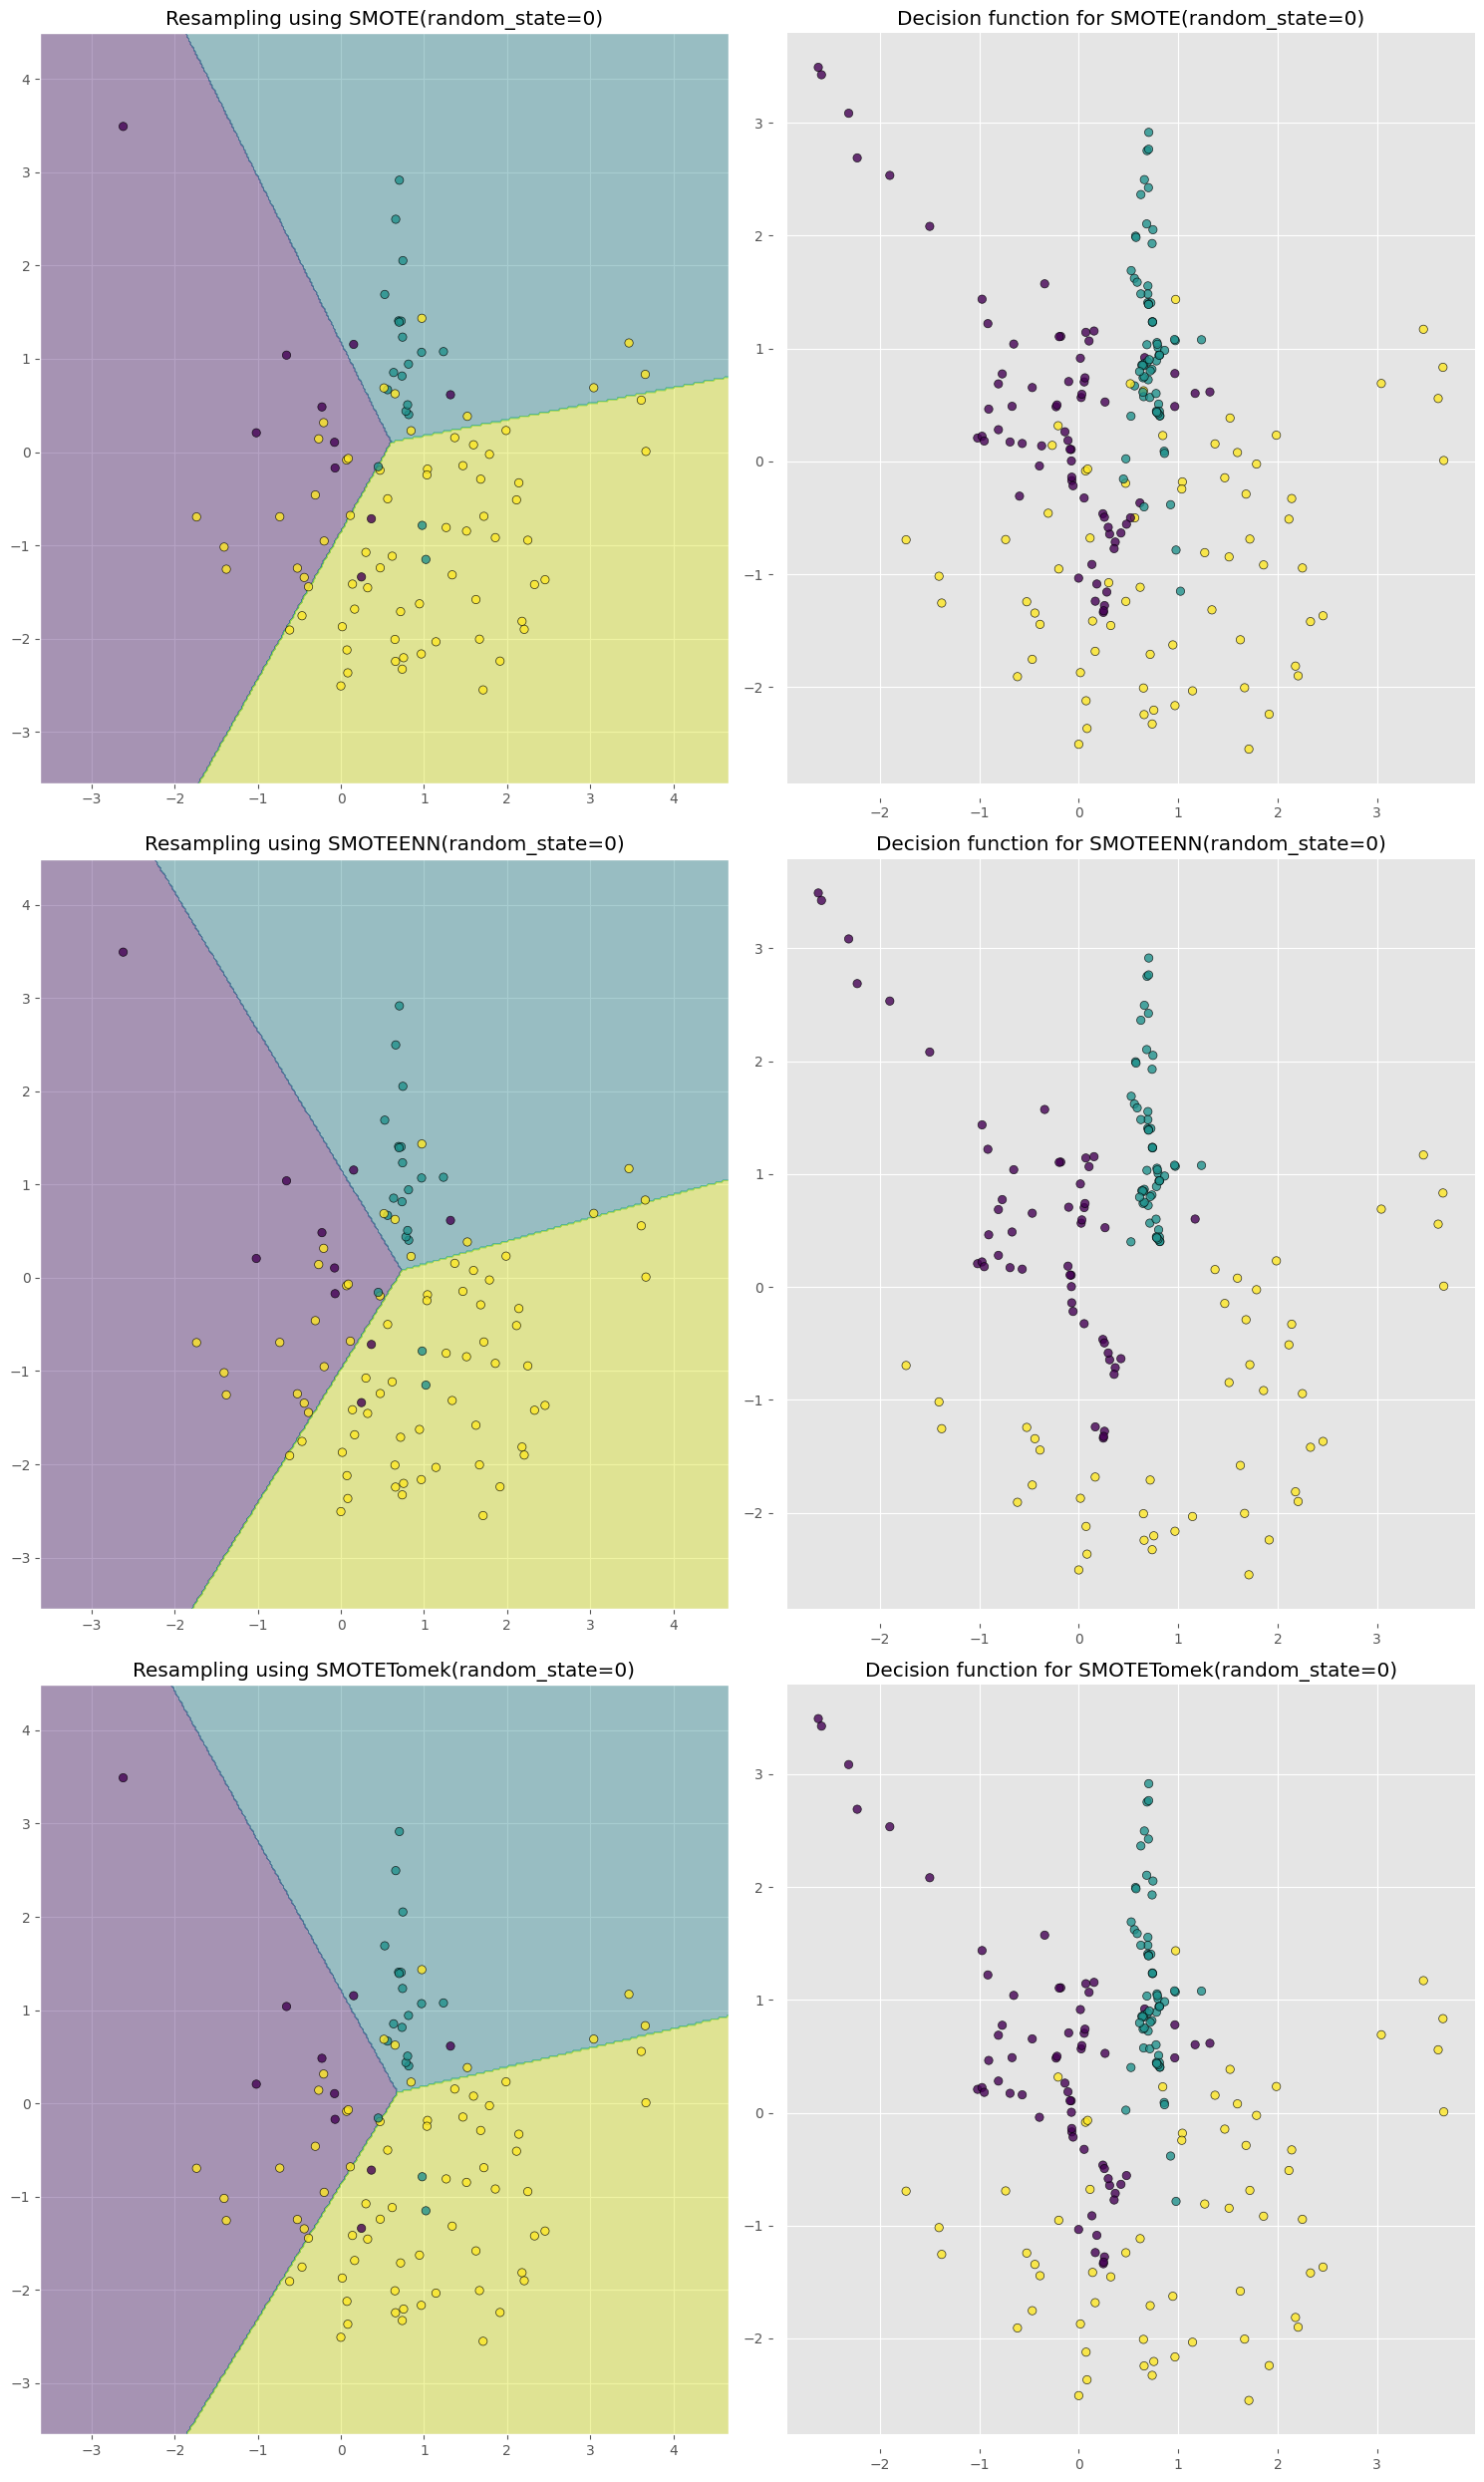

In [127]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0)]

fig, axs = plt.subplots(3, 2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    clf = make_pipeline(sampler, LogisticRegression()).fit(x_train, y_train)
    plot_decision_function(x_train, y_train,clf,ax[0])
    plot_resampling(x_train, y_train, sampler, ax[1])

fig.tight_layout()

plt.show()

# **Feature Importance(XGB)**

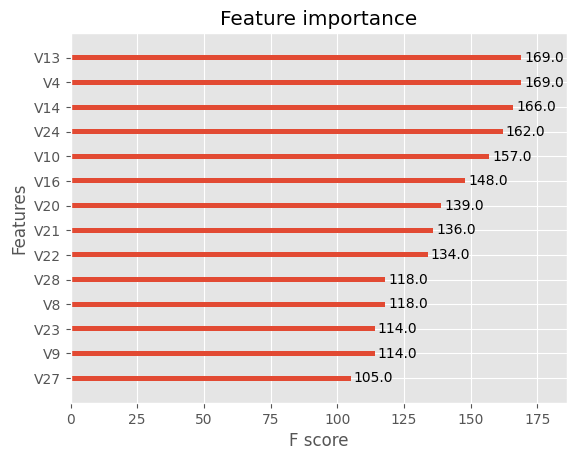

In [128]:
from xgboost import XGBClassifier, plot_importance
plot_importance(XGB)
plt.show()